In [1]:
import json, requests
import numpy as np
import pandas as pd

In [2]:
API_KEY = 'JRLUCAS'

In [3]:
def get_price_history(symbols):
    candle_list = []
    df_dict = {}
    for symbol in symbols:
        API_URL = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbol)
        params = {
            'apikey': API_KEY,
            'periodType': 'year',
            'period': 1,
            'frequencyType': 'daily',
            'frequency': 1,
            'needExtendedHoursData': 'false'
        }

        content = requests.get(url=(API_URL),params=params).text

        data = json.loads(content)
        candle_list.append(data)
        for i in candle_list:
            df = pd.DataFrame.from_dict(i['candles'])
            df_dict[symbol] = df
    return df_dict

In [4]:
etf_list = ['VTI','VEA', 'VWO', 'VNQ', 'XLE', 'BND', 'SCHP', 'VTEB', 'VIG']

In [5]:
df_dict = get_price_history(etf_list)

In [6]:
for k,v in df_dict.items():
    v['Normed Return'] = v['close'] / v.iloc[0]['close']
    v['Allocation'] = v['Normed Return'] * (1/9)
    pos_col = '{} Pos'.format(k)
    v[pos_col] = v['Allocation'] * 100000

In [7]:
pos_ls = []
for k,v in df_dict.items():
    pos_ls.append(v.iloc[:,8])

In [8]:
portfolio_val = pd.concat(pos_ls, axis=1)

In [9]:
portfolio_val['Total'] = portfolio_val.sum(axis=1)

In [10]:
portfolio_val.head()

,VTI Pos,VEA Pos,VWO Pos,VNQ Pos,XLE Pos,BND Pos,SCHP Pos,VTEB Pos,VIG Pos,Total
0,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,100000.000000
1,11209.446435,11205.673759,11270.965521,11137.592686,11164.063189,11080.164859,11092.755751,11111.111111,11188.390864,100460.164174
2,11193.057214,11140.973000,11098.814618,11137.592686,11333.215662,11108.297815,11119.269049,11126.409651,11202.344152,100459.973847
3,11231.298729,11160.880926,11091.436722,11178.011931,11311.152296,11094.231337,11104.992658,11119.853134,11253.863988,100545.721720
4,11247.687949,11233.047157,11076.680931,11161.286726,11369.987939,11084.384803,11104.992658,11119.853134,11242.057359,100639.978654


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total')

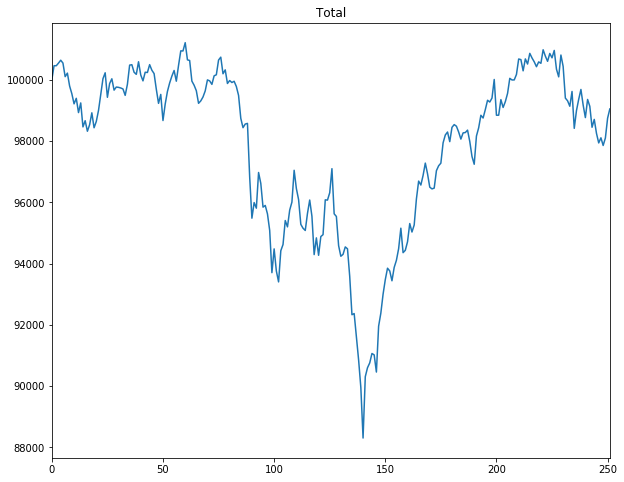

In [12]:
portfolio_val['Total'].plot(figsize=(10,8))
plt.title('Total')

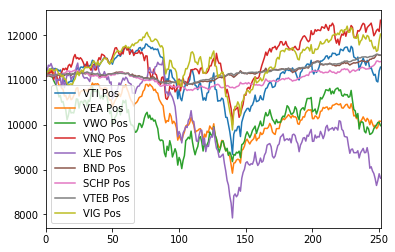

In [13]:
portfolio_val.drop('Total',axis=1).plot(kind='line')

In [14]:
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

In [16]:
portfolio_val.head()

,VTI Pos,VEA Pos,VWO Pos,VNQ Pos,XLE Pos,BND Pos,SCHP Pos,VTEB Pos,VIG Pos,Total,Daily Return
0,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,11111.111111,100000.000000,NaN
1,11209.446435,11205.673759,11270.965521,11137.592686,11164.063189,11080.164859,11092.755751,11111.111111,11188.390864,100460.164174,0.004602
2,11193.057214,11140.973000,11098.814618,11137.592686,11333.215662,11108.297815,11119.269049,11126.409651,11202.344152,100459.973847,-0.000002
3,11231.298729,11160.880926,11091.436722,11178.011931,11311.152296,11094.231337,11104.992658,11119.853134,11253.863988,100545.721720,0.000854
4,11247.687949,11233.047157,11076.680931,11161.286726,11369.987939,11084.384803,11104.992658,11119.853134,11242.057359,100639.978654,0.000937


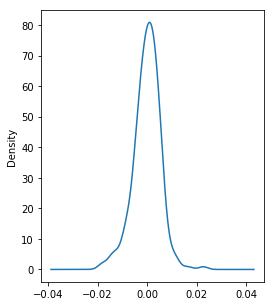

In [21]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5))

In [28]:
cumulative_return = 100 * (portfolio_val['Total'].iloc[-1]/portfolio_val['Total'][0] - 1)

In [29]:
cumulative_return

-0.951243562326487

In [30]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [33]:
ASR = SR * (252**0.5)

In [34]:
ASR

-0.0697242384516446